In [255]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics as stat
import plotnine as p9
import pylab
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [256]:
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [257]:
df.shape

(10000, 50)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [259]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [260]:
# A3. I am going to remove the "item#" columns and others since they do not affect what I'm looking for. 

In [261]:
df.drop(['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1, inplace=True)

In [262]:
df.drop(['Zip', 'Lat', 'Lng', 'TimeZone', 'Children', 'Gender', 'Email', 'Port_modem', 'Tablet'], axis=1, inplace=True)

In [263]:
df.drop(['Interaction', 'City', 'State', 'County', 'Population', 'Area', 'Marital', 'Contacts', 'Techie', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection'], axis=1, inplace=True)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   Job                   10000 non-null  object 
 4   Age                   10000 non-null  int64  
 5   Income                10000 non-null  float64
 6   Churn                 10000 non-null  object 
 7   Outage_sec_perweek    10000 non-null  float64
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Contract              10000 non-null  object 
 10  InternetService       10000 non-null  object 
 11  Phone                 10000 non-null  object 
 12  Multiple              10000 non-null  object 
 13  TechSupport           10000 non-null  object 
 14  StreamingTV           10000 non-null  object 
 15  StreamingMovies     

In [265]:
#initial statistics of the numeric variables
df[['Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']].describe()

,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39806.926771,10.001848,0.398000,34.526188,172.624816
std,28199.916702,2.976019,0.635953,26.443063,42.943094
min,348.670000,0.099747,0.000000,1.000259,79.978860
25%,19224.717500,8.018214,0.000000,7.917694,139.979239
50%,33170.605000,10.018560,0.000000,35.430507,167.484700
75%,53246.170000,11.969485,1.000000,61.479795,200.734725
max,258900.700000,21.207230,6.000000,71.999280,290.160419


In [266]:
# dataset has 10,000 rows, 50 columns total (but now 21 columns). 
# Minimum monthly charge is $79, Max is $290, with average of $172, std dev of $42. 75% of customers pay less than $200 monthly; 25% pay less than $139
# Avg tenure is 34 months with a std dev of 26 months; minimum tenure is 1 month, max tenure is only 72 months
# Avg income is $39,806 - min is $348, max is $258,900
# Average outage (in seconds) per week is 10, with a std dev of 3. 
# 75% of customers have a least one equipment failure/year. 

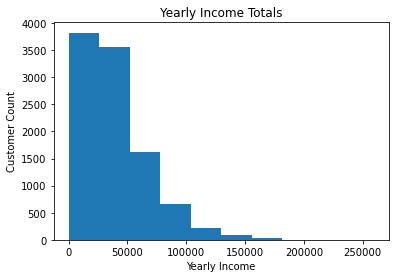

In [267]:
#univariate anlysis 
plt.hist(df['Income'])
plt.xlabel('Yearly Income')
plt.ylabel('Customer Count')
plt.title('Yearly Income Totals');

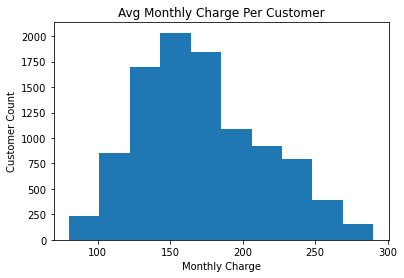

In [268]:
#univariate anlysis 
plt.hist(df['MonthlyCharge'])
plt.xlabel('Monthly Charge')
plt.ylabel('Customer Count')
plt.title('Avg Monthly Charge Per Customer');

In [269]:
# the above shows a normal distribution

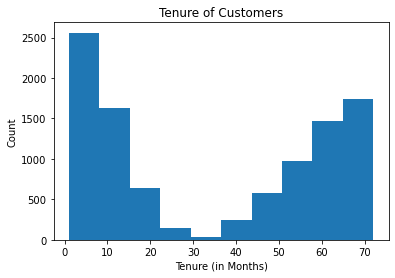

In [270]:
#univariate anlysis 
plt.hist(df['Tenure'])
plt.xlabel('Tenure (in Months)')
plt.ylabel('Count')
plt.title('Tenure of Customers');

In [271]:
# the above shows an inverted bell curve (ie, not a normal distribution)

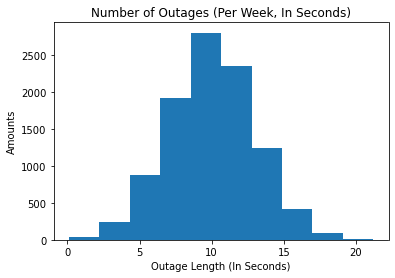

In [272]:
#univariate anlysis 
plt.hist(df['Outage_sec_perweek'])
plt.xlabel('Outage Length (In Seconds)')
plt.ylabel('Amounts')
plt.title('Number of Outages (Per Week, In Seconds)');

In [273]:
# the above is also a normal distribution (bell curve)

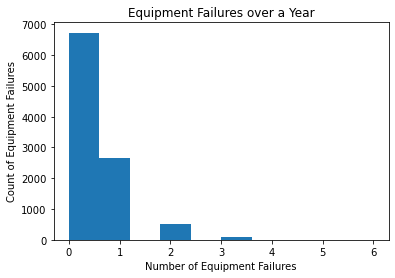

In [274]:
#univariate anlysis 
plt.hist(df['Yearly_equip_failure'])
plt.xlabel('Number of Equipment Failures')
plt.ylabel('Count of Equipment Failures')
plt.title('Equipment Failures over a Year');

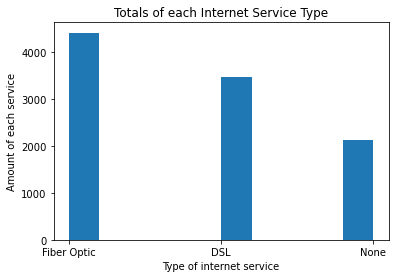

In [275]:
plt.hist(df['InternetService'])
plt.xlabel('Type of internet service')
plt.ylabel('Amount of each service')
plt.title('Totals of each Internet Service Type');

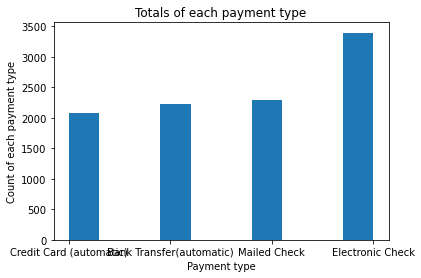

In [276]:
plt.hist(df['PaymentMethod'])
plt.xlabel('Payment type')
plt.ylabel('Count of each payment type')
plt.title('Totals of each payment type');

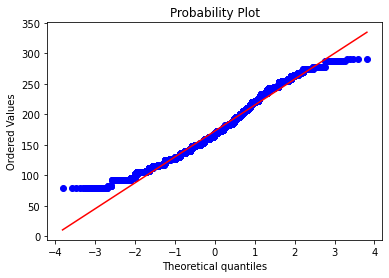

In [277]:
# let's see a Q-Q plot for Monthly Charge
stats.probplot(df.MonthlyCharge, dist="norm", plot=pylab)
pylab.show()

In [278]:
df['MonthlyCharge'].corr(df['Outage_sec_perweek'])

0.020496073549462177

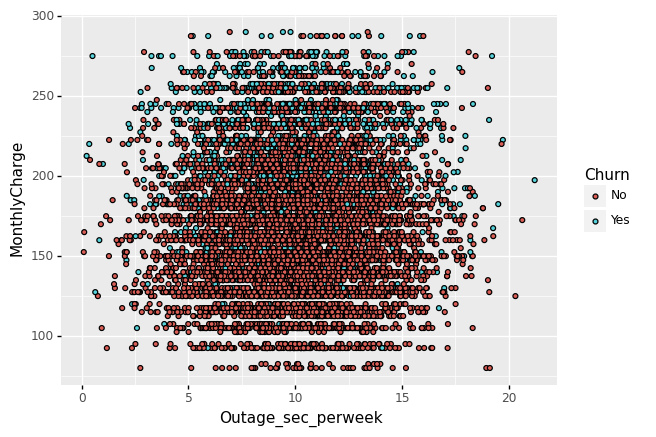

<ggplot: (138589065807)>

In [279]:
# the above correlation coefficient shows there's not a big correlation between monthly charge and outages per week;
# let's see it visualized
(p9.ggplot(df)+
p9.aes(x='Outage_sec_perweek', y='MonthlyCharge', fill='Churn')+
p9.geom_point())

In [280]:
# pearson test for correlation
pearson = stats.pearsonr(df.MonthlyCharge, df.Outage_sec_perweek)
print(pearson)

(0.020496073549462118, 0.04040676034461362)


In [281]:
# the correlation coefficient is 0.02, and the p-value is 0.04; less than alpha, so there's enough to believe to reject the null
# hypothesis for these two having a relationship.

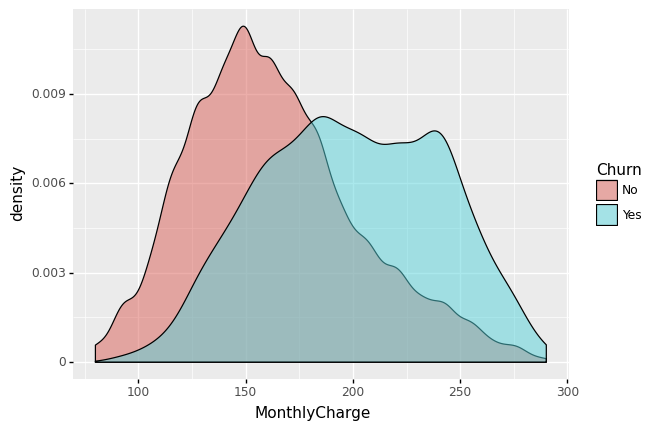

<ggplot: (138591983607)>

In [282]:
#bivariate analysis
(p9.ggplot(df)+
p9.aes('MonthlyCharge', fill='Churn')+
p9.geom_density(alpha=0.5))

In [283]:
# t-test
p = stats.ttest_ind(df.MonthlyCharge, df.Outage_sec_perweek)
print(p)

Ttest_indResult(statistic=377.78799686797214, pvalue=0.0)
